# Explore Data

In [1]:
# Load library
import csv
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

In [2]:
# Read data
data = pd.read_csv("data/data_odd_2005.csv",encoding= 'utf-8')

In [3]:
# Let's take a look at data
data.head()

,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,26989,2/8/2005,Finland,Latvia,Latvia,Cyprus International Tournament,3,2,16,17,12,18,5,2,0,2,2.2343,3.1929,2.8000,win
1,27011,2/9/2005,Japan,North Korea,Japan,FIFA World Cup qualification,0,3,11,17,18,11,6,3,2,3,1.3180,4.1900,8.6980,win
2,27025,2/9/2005,Saudi Arabia,Uzbekistan,Uzbekistan,FIFA World Cup qualification,0,0,17,15,9,12,6,6,2,2,3.1000,3.2000,2.0467,draw
3,26994,2/9/2005,Bahrain,Iran,Bahrain,FIFA World Cup qualification,0,1,20,20,12,16,3,6,4,3,2.4629,3.1786,2.5429,draw
4,27005,2/9/2005,Denmark,Greece,Greece,FIFA World Cup qualification,5,3,11,8,17,8,3,4,5,4,3.0778,3.0667,2.1478,lose


In [4]:
data.shape

(5739, 20)

In [5]:
data.columns

Index(['id', 'date', 'team_1', 'team_2', 'home_team', 'tournament',
       'h_win_diff', 'h_draw', 'f_goalF_1', 'f_goalF_2', 'f_goalA_1',
       'f_goalA_2', 'f_win_1', 'f_win_2', 'f_draw_1', 'f_draw_2',
       'avg_odds_win_1', 'avg_odds_draw', 'avg_odds_win_2', 'result'],
      dtype='object')

__1. Is playing as "Home Team" better than playing as "Away Team"?__

In [7]:
win_result = data[data.result == 'win']
lose_result = data[data.result == 'lose']
draw_result = data[data.result == 'draw']

In [12]:
# Filter out matches that "Home Team" win
home_win1 = win_result[win_result.team_1 == win_result.home_team]
home_win2 = lose_result[lose_result.team_1 != lose_result.home_team]


In [15]:
home_win = home_win1.shape[0] + home_win2.shape[0]
home_win

2694

In [16]:
# Filter out matches "Draw"
home_draw = draw_result.shape[0]
home_draw

1362

In [17]:
home_lose = data.shape[0] - home_win - home_draw
home_lose

1683

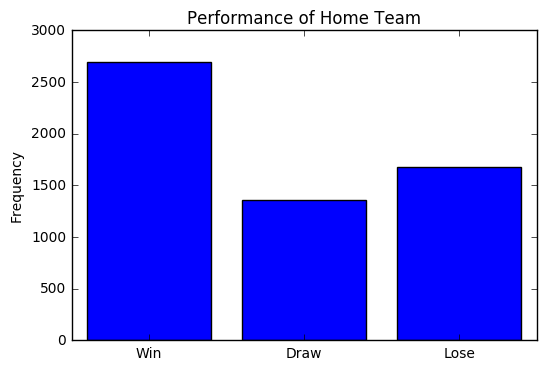

In [18]:
# Create a bar chart
label = ('Win', 'Draw', 'Lose')
y_pos = np.arange(len(label))
home_performance = [home_win, home_draw, home_lose]

plt.bar(y_pos, home_performance, align = 'center')
plt.xticks(y_pos, label)
plt.ylabel('Frequency')
plt.title('Performance of Home Team')
plt.show()

__2.How head-to-head match history affect the current match?__

In [19]:
# Let's investigate win difference
w_diff_winner = pd.concat([win_result['h_win_diff'], -lose_result['h_win_diff']])
w_diff_loser = pd.concat([lose_result['h_win_diff'], -win_result['h_win_diff']])
w_diff_draw = draw_result['h_win_diff']

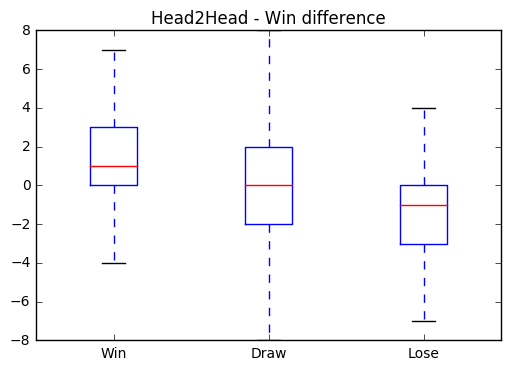

In [21]:
# Create a box plot to compare win difference
h2h_performance = [w_diff_winner, w_diff_draw, w_diff_loser]
plt.boxplot(h2h_performance, labels= label, showfliers=False)
plt.title('Head2Head - Win difference')
plt.show()

__3. How recent form affect the currect match?__

In [22]:
# Let's investigate the number of wins of 10 recent matches
n_win_winner = pd.concat([win_result['f_win_1'], lose_result['f_win_2']])
n_win_loser = pd.concat([lose_result['f_win_1'], win_result['f_win_2']])
n_win_draw = pd.concat([draw_result['f_win_1'], draw_result['f_win_2']])

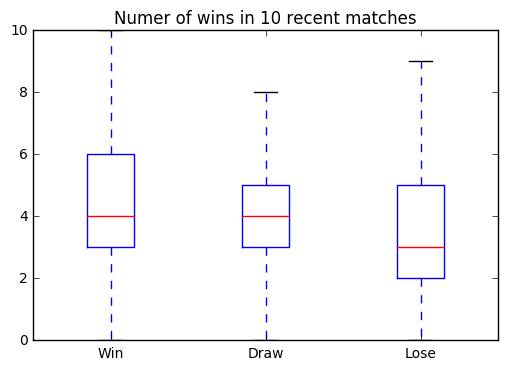

In [23]:
form = [n_win_winner, n_win_draw, n_win_loser]
plt.boxplot(form, labels= label, showfliers= False)
plt.title('Numer of wins in 10 recent matches')
plt.show()

__Use PCA to visualize data__

In [24]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [25]:
# Convert Home_Team to number
same_ht = data.team_1 == data.home_team
data.loc[same_ht, 'home_team'] = 1
data.loc[-same_ht, 'home_team'] = 0

In [35]:
data.head()

,home_team,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,0,0.487910,-0.127452,0.162802,0.420014,0.319129,1.860128,0.554430,-1.067600,-1.704041,-0.295723,-0.398190,-0.508248,-0.262829,2
1,1,-0.015014,0.124250,-0.861001,0.420014,1.764084,0.070519,1.057732,-0.546689,-0.293266,0.408198,-0.534106,-0.059218,0.782114,2
2,0,-0.015014,-0.630855,0.367563,0.001204,-0.403349,0.326177,1.057732,1.016044,-0.293266,-0.295723,-0.269779,-0.505051,-0.396290,0
3,1,-0.015014,-0.379154,0.981845,1.048228,0.319129,1.348811,-0.452174,1.016044,1.117509,0.408198,-0.364281,-0.514688,-0.308379,0
4,0,0.823194,0.124250,-0.861001,-1.464630,1.523258,-0.696456,-0.452174,-0.025778,1.822897,1.112120,-0.273072,-0.565081,-0.378379,1


In [27]:
# Convert result to number
le_result = preprocessing.LabelEncoder().fit(data['result'])
data['result'] = le_result.transform(data['result'])

In [30]:
label = le_result.classes_

In [32]:
# Just keep useful features
col_index = list(range(4,20))
col_index.remove(5)
data = data.iloc[:,col_index]

In [34]:
# Standardize / Normalize data except "Home_Team" and "Result"
scaler = StandardScaler()
data.iloc[:,1:14] = scaler.fit_transform(data.iloc[:,1:14])

In [36]:
data_x = data.iloc[:,:-1]
data_y = data.iloc[:,-1].squeeze()

In [37]:
pca = PCA(n_components=2).fit(data_x)
x_reduced = pca.transform(data_x)

In [39]:
x_reduced.shape

(5739, 2)

In [40]:
data_x.shape

(5739, 14)

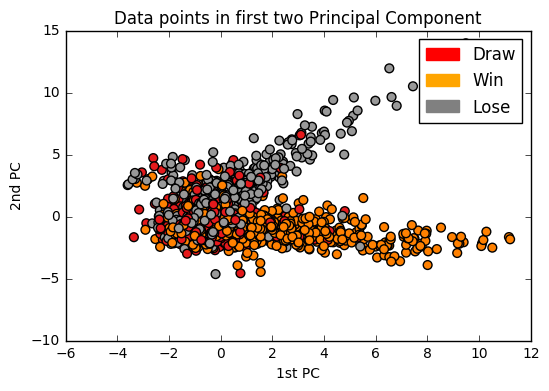

In [42]:
# Plot new data points
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c= data_y, cmap = plt.cm.Set1, s = 40, edgecolors='k')
plt.title("Data points in first two Principal Component")
plt.xlabel('1st PC')
plt.ylabel('2nd PC')

# Add legend 
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color = 'red', label = 'Draw')
orange_patch = mpatches.Patch(color = 'orange', label = 'Win')
gray_patch = mpatches.Patch(color = 'gray', label = 'Lose')
plt.legend(handles=[red_patch,orange_patch,gray_patch])
plt.show()